In [1]:
import numpy as np
import pandas as pd

### Loading and Preprocessing the Data

In [2]:
data = pd.read_csv("data/diabetes2.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
labels = data["Outcome"]
labels = np.array(labels,dtype=int)

In [4]:
data=data.drop("Outcome",axis=1)

In [5]:
#Normalizing the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns, index=data.index)

In [6]:
 data=data.to_numpy()
data

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
labels=labels.reshape(labels.shape[0],1)

In [9]:
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size=0.2)

In [10]:
train_data.shape,test_data.shape,train_labels.shape,test_labels.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [11]:
m_train=train_data.shape[0]
m_test=test_data.shape[0]

In [12]:
#Splitting the data into train and test splits
train_data,test_data,train_labels,test_labels=train_data.T,test_data.T,train_labels.T,test_labels.T


## Utility Functions

In [13]:
#Activation Function
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [14]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [15]:
#Forward and backward propogation 
def forward_and_backward_propogation(w,b,X,Y):
    m = X.shape[1]
    #Forward Proppgation
    A = sigmoid( w.T @ X + b )                                   
    cost = -1 / m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) 
    
    # Backward Propogation
    dw = 1/m * X @ (A - Y).T
    db = 1/m * np.sum(A - Y)
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
    

In [16]:
def predict(w, b, X):
    
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    
    A = sigmoid(w.T @ X + b) 
    
    for i in range(A.shape[1]):
        Y_prediction[:, i] = (A[:, i] > 0.5) * 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [17]:
def optimizer(w,b,X,Y,num_epochs,learning_rate):
    costs=[]
    accuracies = []
    
    for i in range(num_epochs):
        gradients,cost = forward_and_backward_propogation(w,b,X,Y)
        
        dw = gradients["dw"]
        db = gradients["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costs.append(cost)
        
        
        Y_prediction = predict(w - learning_rate * dw,b - learning_rate * db,X)
        accuracy = 1 - np.mean(np.abs(Y_prediction - Y))
        accuracies.append(accuracy)
        print("Epoch {} : (Loss : {}, Correctness : {})".format(i+1,cost,accuracy))
        
    params = {"w":w,
            "b":b}
    gradients = {"dw":dw,
                "db":db}
    return params,gradients,costs,accuracies

### Putting it all together

In [18]:

def model(X_train, Y_train, X_test, Y_test, num_epochs = 2000, learning_rate = 0.5):
   
    
    w, b = initialize_with_zeros(X_train.shape[0])

    
    parameters, grads, costs, accuracies = optimizer(w, b, X_train, Y_train, num_epochs, learning_rate)
    

    w = parameters["w"]
    b = parameters["b"]
    
    
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("Final test accuracy: {}/{} ({} %)".format( m_test-np.sum(np.abs(Y_prediction_test - Y_test)),Y_test.shape[1],100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "accuracies": accuracies,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_epochs": num_epochs}
    
    return d

## Results

In [19]:
d = model(train_data,train_labels, test_data, test_labels, num_epochs = 200, learning_rate = 0.4)

Epoch 1 : (Loss : 0.6931471805599454, Correctness : 0.6563517915309447)
Epoch 2 : (Loss : 0.6788113220577365, Correctness : 0.6563517915309447)
Epoch 3 : (Loss : 0.6695863620427146, Correctness : 0.6563517915309447)
Epoch 4 : (Loss : 0.6635285850100887, Correctness : 0.6563517915309447)
Epoch 5 : (Loss : 0.6594370752946821, Correctness : 0.6563517915309447)
Epoch 6 : (Loss : 0.6565719197377141, Correctness : 0.6563517915309447)
Epoch 7 : (Loss : 0.6544761063337319, Correctness : 0.6563517915309447)
Epoch 8 : (Loss : 0.6528659993088195, Correctness : 0.6563517915309447)
Epoch 9 : (Loss : 0.651564587229219, Correctness : 0.6563517915309447)
Epoch 10 : (Loss : 0.6504607943405378, Correctness : 0.6563517915309447)
Epoch 11 : (Loss : 0.6494845680408105, Correctness : 0.6563517915309447)
Epoch 12 : (Loss : 0.6485915303030717, Correctness : 0.6563517915309447)
Epoch 13 : (Loss : 0.6477534582736814, Correctness : 0.6563517915309447)
Epoch 14 : (Loss : 0.646952342361789, Correctness : 0.6563517

Epoch 156 : (Loss : 0.5759615498441184, Correctness : 0.6970684039087948)
Epoch 157 : (Loss : 0.5756297129413295, Correctness : 0.6970684039087948)
Epoch 158 : (Loss : 0.575299448229939, Correctness : 0.6954397394136808)
Epoch 159 : (Loss : 0.5749707445772805, Correctness : 0.6954397394136808)
Epoch 160 : (Loss : 0.5746435909501718, Correctness : 0.6938110749185668)
Epoch 161 : (Loss : 0.5743179764139386, Correctness : 0.6938110749185668)
Epoch 162 : (Loss : 0.5739938901314489, Correctness : 0.6938110749185668)
Epoch 163 : (Loss : 0.5736713213621558, Correctness : 0.6938110749185668)
Epoch 164 : (Loss : 0.5733502594611501, Correctness : 0.6938110749185668)
Epoch 165 : (Loss : 0.5730306938782203, Correctness : 0.6938110749185668)
Epoch 166 : (Loss : 0.572712614156922, Correctness : 0.6938110749185668)
Epoch 167 : (Loss : 0.5723960099336569, Correctness : 0.6938110749185668)
Epoch 168 : (Loss : 0.5720808709367592, Correctness : 0.6921824104234527)
Epoch 169 : (Loss : 0.5717671869855909, 

## Plots

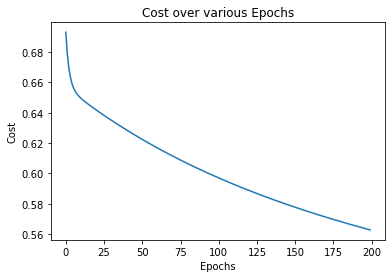

In [20]:
import matplotlib.pyplot as plt
plt.plot(d["costs"]);
plt.xlabel("Epochs")
plt.ylabel("Cost");
plt.title("Cost over various Epochs");

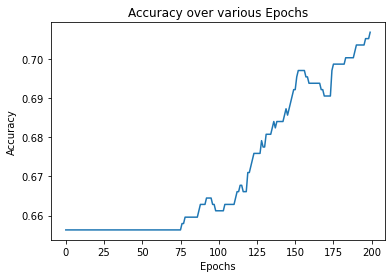

In [21]:
plt.plot(d["accuracies"]);
plt.xlabel("Epochs")
plt.title("Accuracy over various Epochs")
plt.ylabel("Accuracy");